In [1]:
from corner import corner

In [2]:
import numpy as np

In [3]:
ndim, nsamples = 2, 100000
np.random.seed(42)
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])

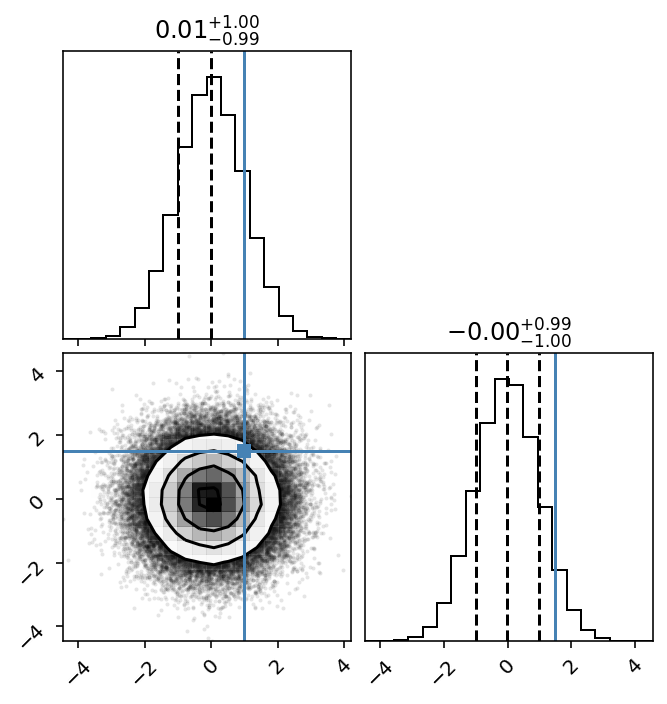

In [4]:
figure = corner(samples,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12},truths=[1,1.5])


In [5]:
r=np.hypot(samples[:,0],samples[:,1])

In [6]:
np.sum(r<1),np.sum(r<1.5),np.sum(r<2)

(39180, 67423, 86458)

In [7]:
1-np.exp(-1/2),1-np.exp(-2.25/2),1-np.exp(-4/2)

(0.3934693402873666, 0.6753475326416503, 0.8646647167633873)

# Cen X-3 Results

In [8]:
dd4b = np.loadtxt('minimum2M.txt.gz',unpack=True)

In [9]:
dd4b[:,0]=np.tanh(dd4b[:,0])
#dd4b[:,4]+=0.5

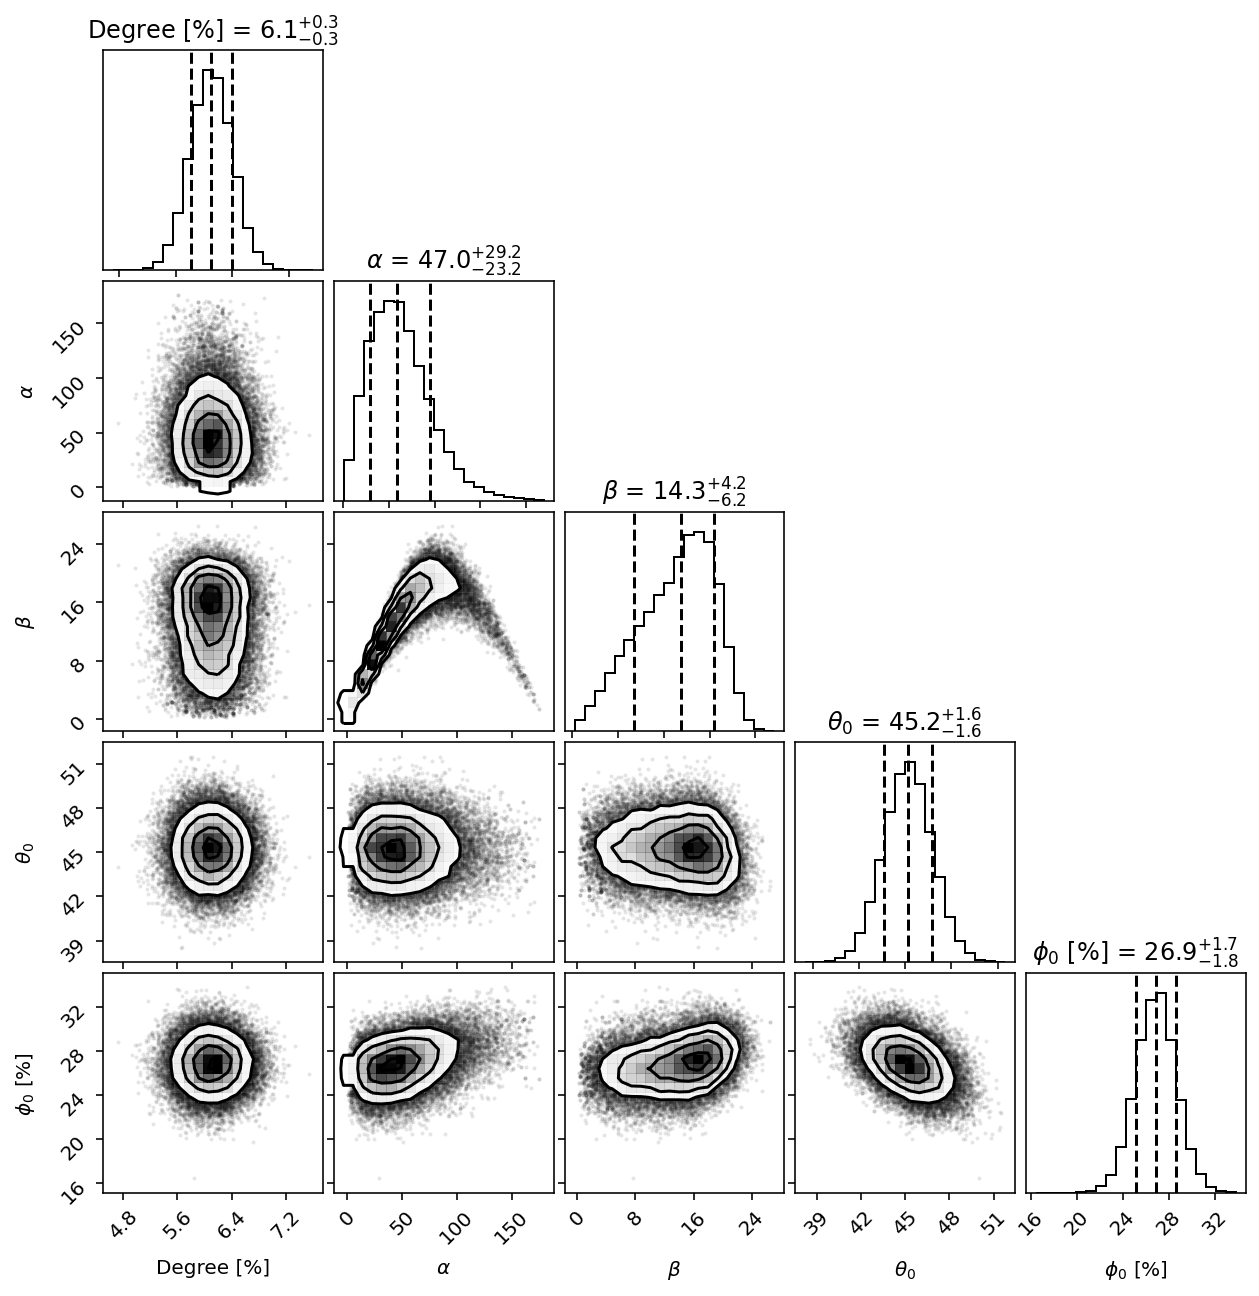

In [10]:
fig=plt.figure(figsize=(9,9))
nskip=40
cc=corner(dd4b[::nskip]*np.array([100,1,1,1,100]),labels=['Degree [%]',r'$\alpha$',r'$\beta$',r'$\theta_0$',r'$\phi_0$ [%]'],quantiles=[0.16,0.5,0.84],show_titles=True,fig=fig,title_fmt=".1f")
fig.savefig('C3_unweighted.pdf')

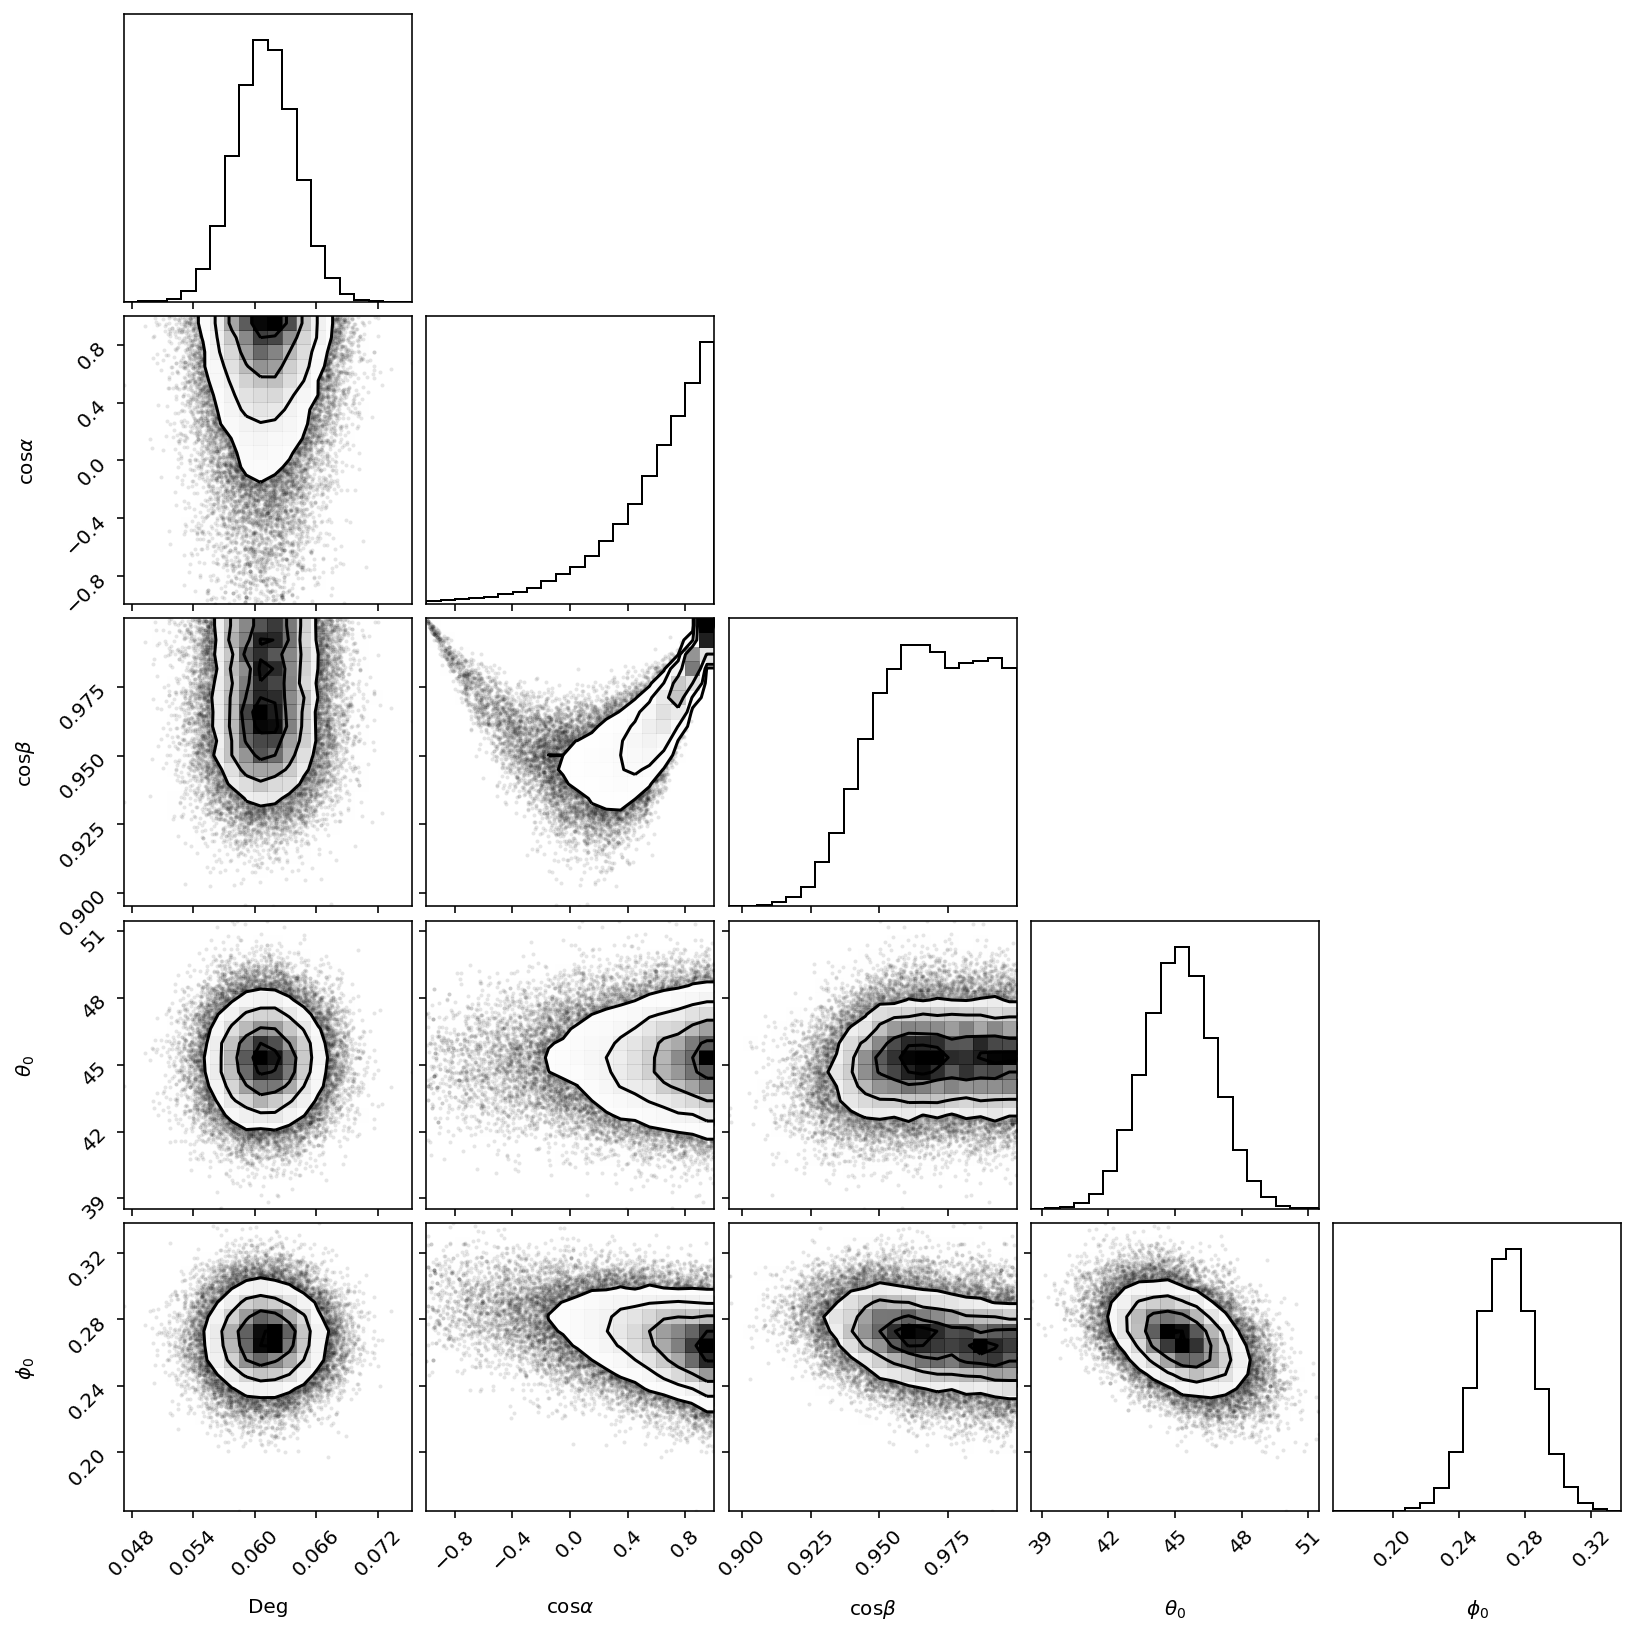

In [11]:
cc=corner(np.transpose([dd4b[::nskip,0],np.cos(np.radians(dd4b[::nskip,1])),np.cos(np.radians(dd4b[::nskip,2])),dd4b[::nskip,3],dd4b[::nskip,4]]),labels=['Deg',r'$\cos\alpha$',r'$\cos\beta$',r'$\theta_0$',r'$\phi_0$'])

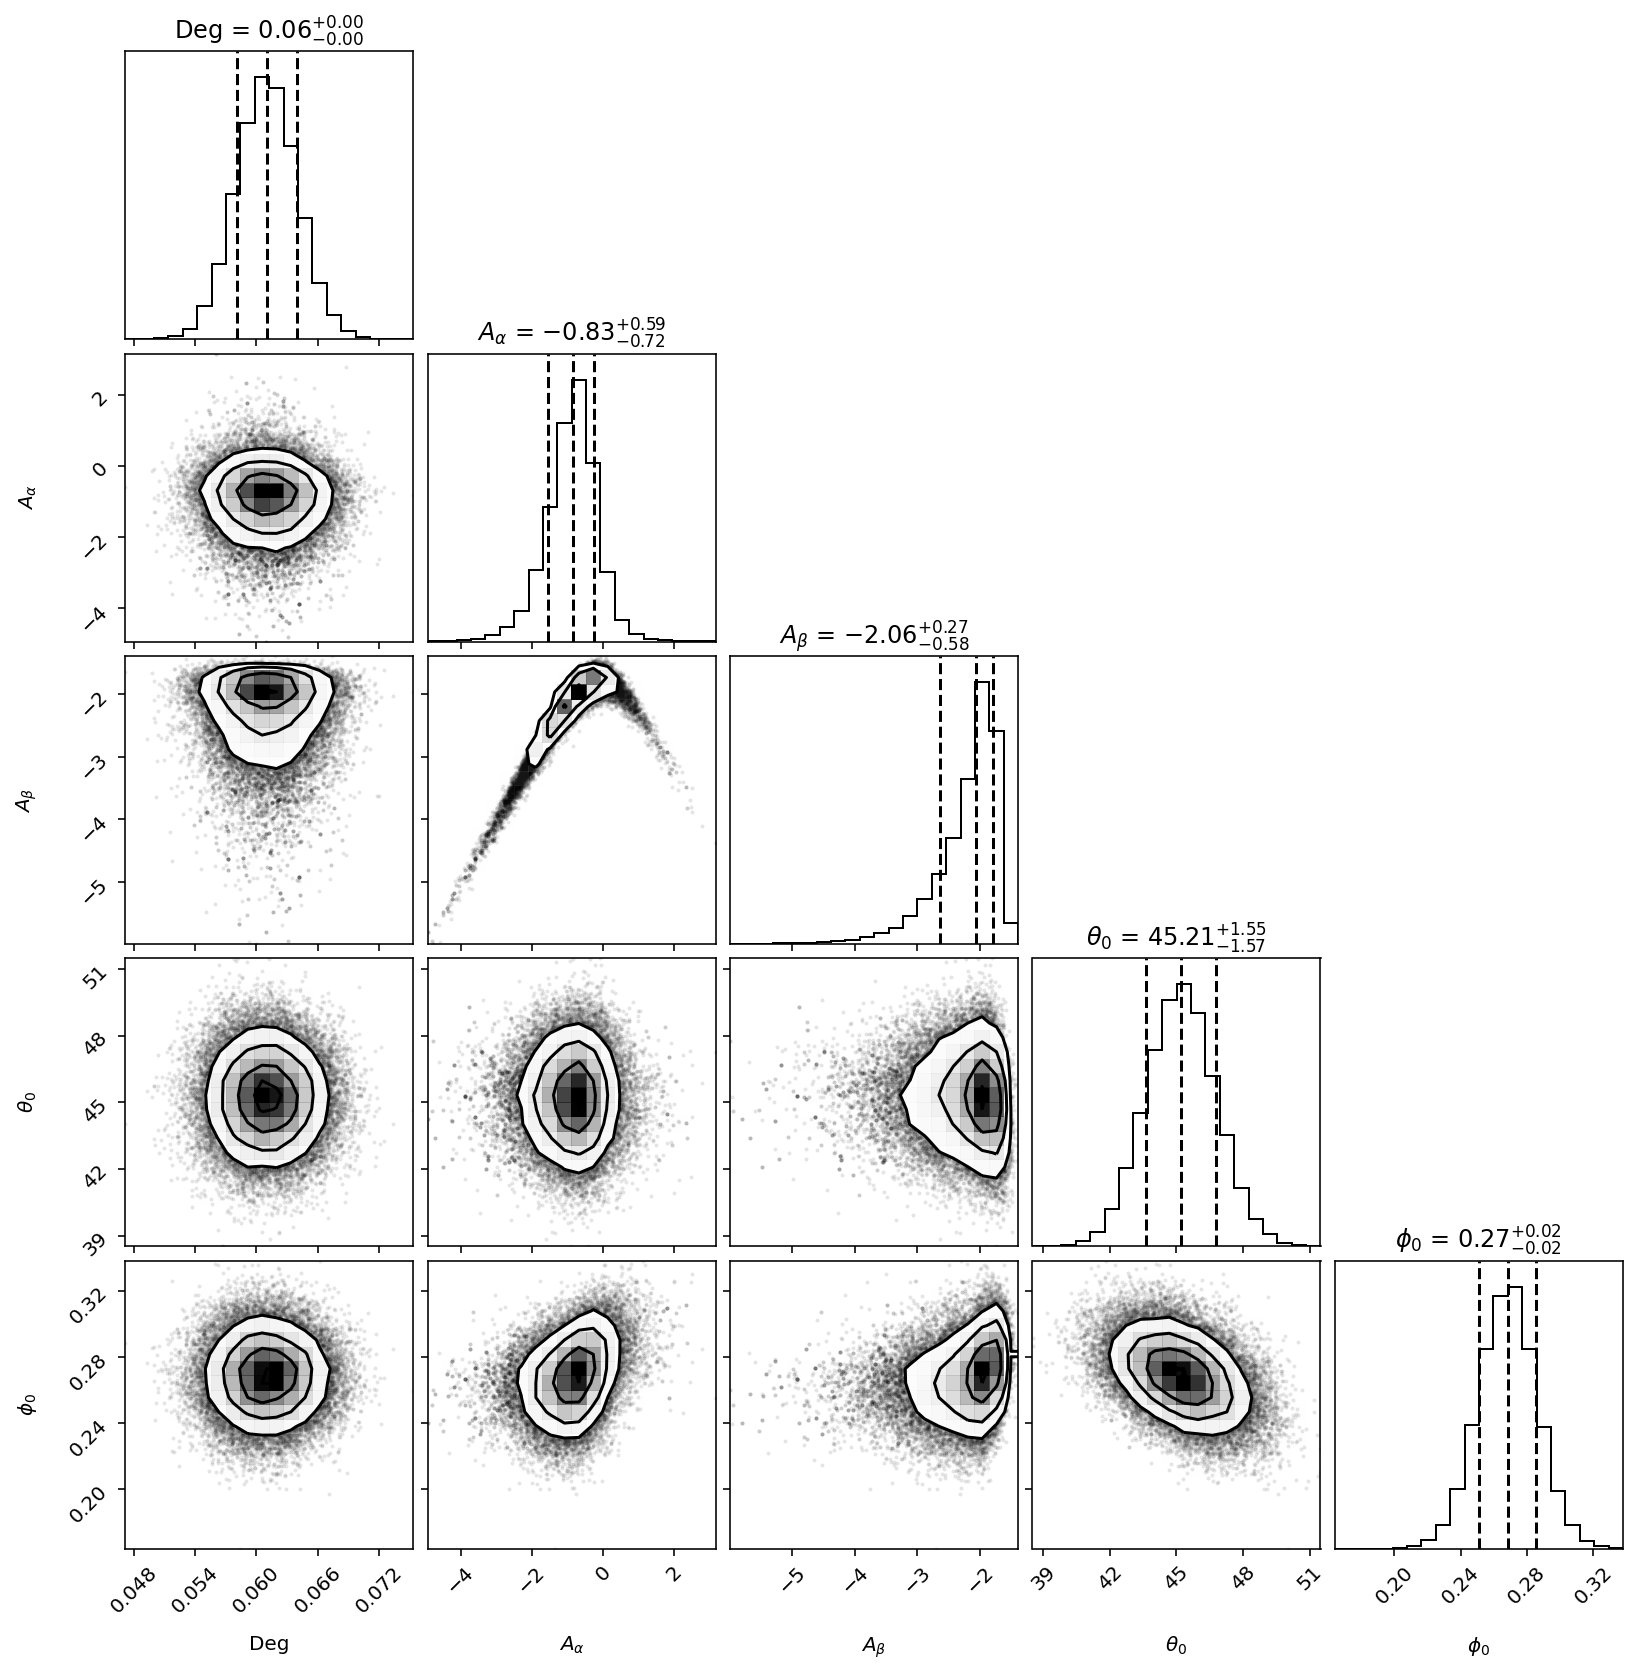

In [12]:
cc=corner(np.transpose([dd4b[::nskip,0],np.log(np.abs(np.tan(np.radians(dd4b[::nskip,1]/2)))),
                        np.log(np.abs(np.tan(np.radians(dd4b[::nskip,2]))/2)),dd4b[::nskip,3],dd4b[::nskip,4]]),labels=['Deg',r'$A_\alpha$',r'$A_\beta$',r'$\theta_0$',r'$\phi_0$'],quantiles=[0.16,0.5,0.84],show_titles=True)

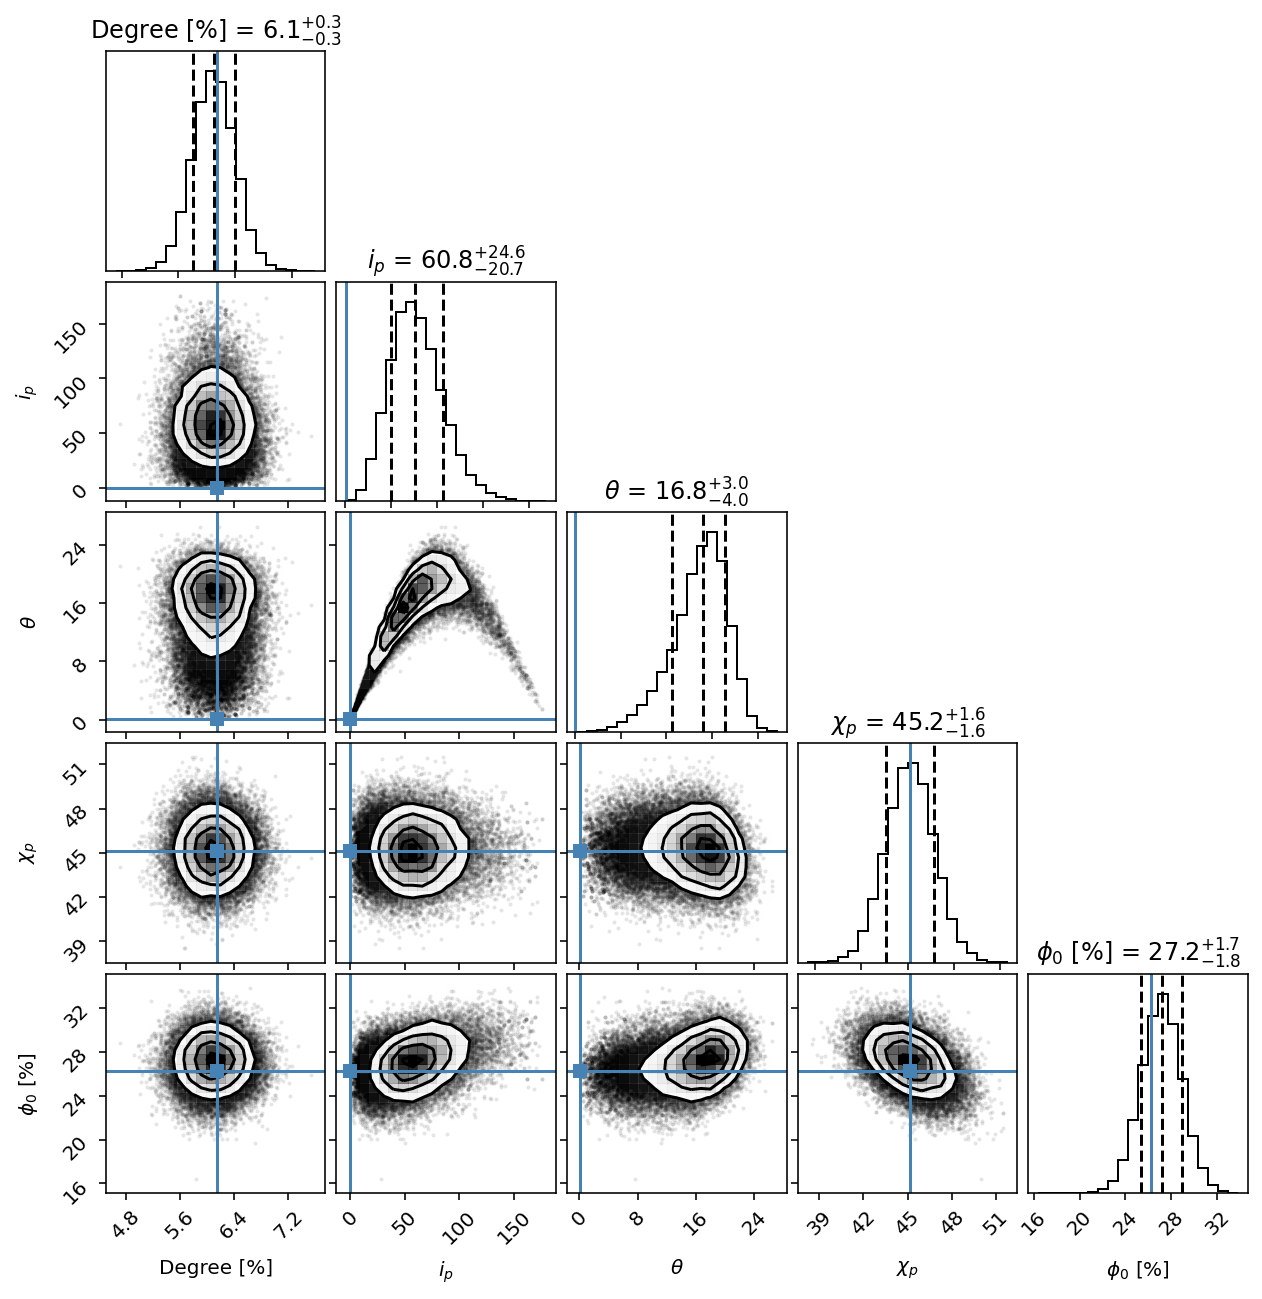

In [13]:
fig=plt.figure(figsize=(9,9))
dd4b[:,3]=np.where(dd4b[:,0]>0,dd4b[:,3],dd4b[:,3]+90)
dd4b[:,0]=np.abs(dd4b[:,0])
cc=corner(dd4b[::nskip]*np.array([100,1,1,1,100]),labels=['Degree [%]',r'$i_p$',r'$\theta$',r'$\chi_p$',r'$\phi_0$ [%]'],weights=np.sin(np.radians(dd4b[::nskip,1]))*np.sin(np.radians(dd4b[::nskip,2])),quantiles=[0.16,0.5,0.84],show_titles=True,fig=fig,title_fmt='.1f',truths=[ 100*6.14394854e-02, 9.78690448e-02,  3.56972834e-02,  4.51436712e+01,(-2.37867433e-01+0.5)*100])
fig.savefig('C3_weighted.pdf')

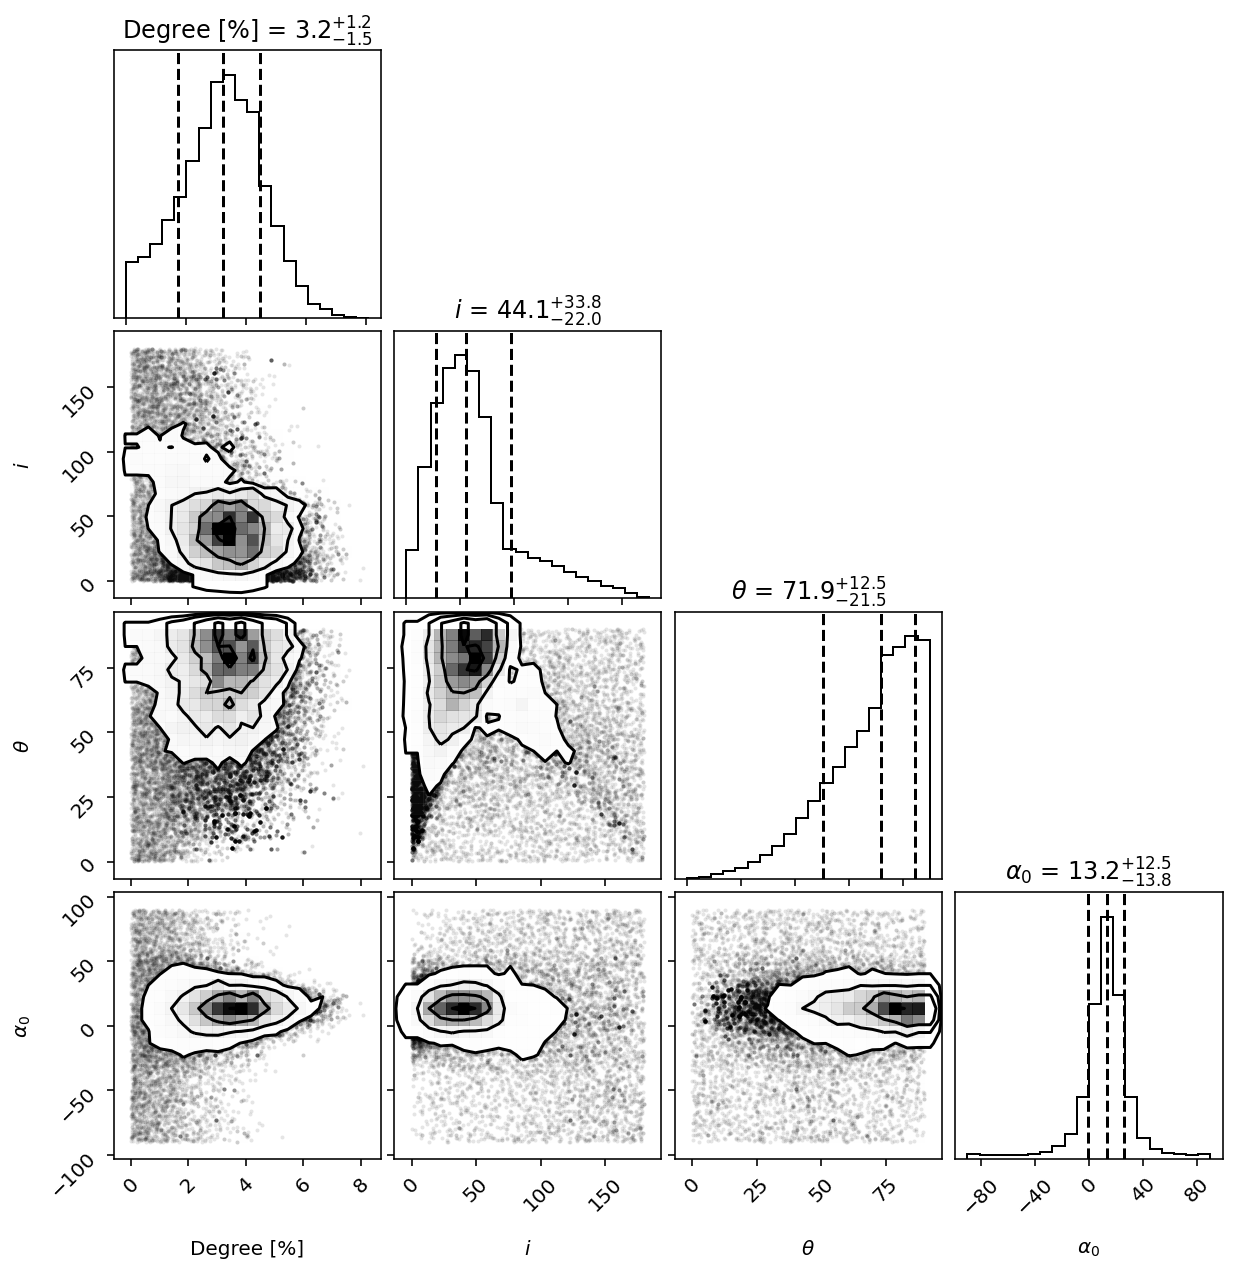

In [14]:
fig=plt.figure(figsize=(9,9))
cc=corner(np.transpose([100*dd4b[::nskip,0],dd4b[::nskip,1],dd4b[::nskip,2],np.mod(dd4b[::nskip,3]+dd4b[::nskip,4]*360+90,180)-90]),labels=['Degree [%]',r'$i$',r'$\theta$',r'$\alpha_0$'],weights=np.sin(np.radians(dd4b[::nskip,1]))*np.sin(np.radians(dd4b[::nskip,2])),quantiles=[0.16,0.5,0.84],show_titles=True,fig=fig,title_fmt='.1f')
fig.savefig('C3b_sum__weighted.pdf')

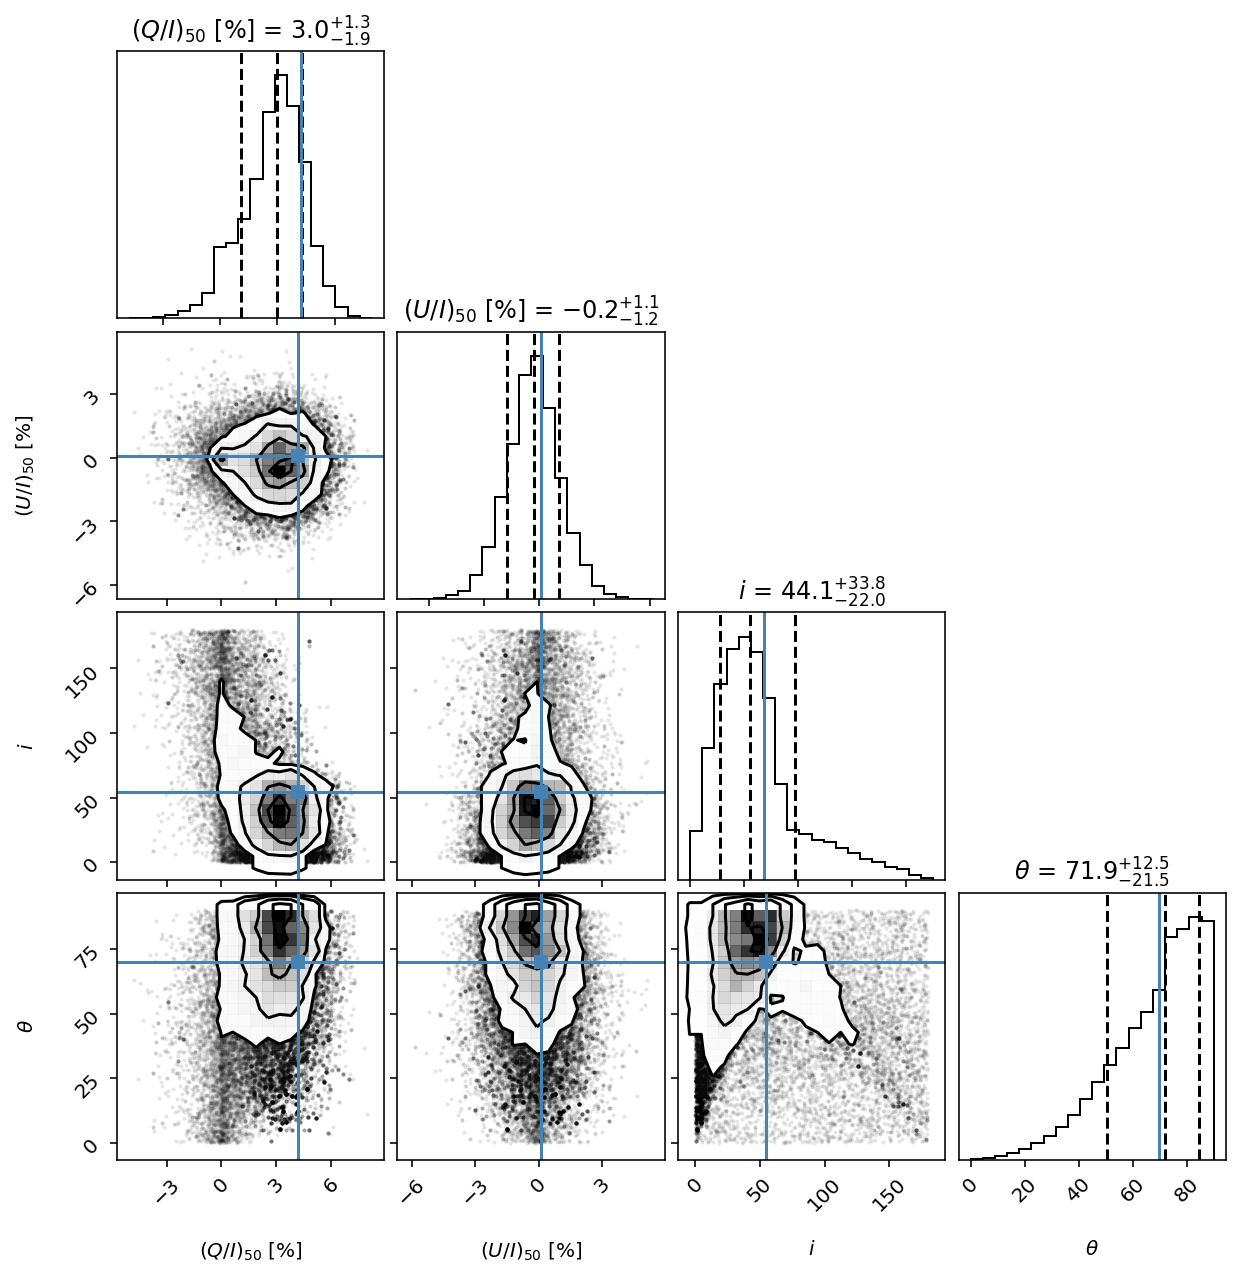

In [15]:
pshift=-0.045
fig=plt.figure(figsize=(9,9))
aa=np.radians(dd4b[::nskip,3]+(dd4b[::nskip,4]+pshift)*360)
rr=100*dd4b[::nskip,0]
cc=corner(np.transpose([rr*np.cos(2*aa),rr*np.sin(2*aa),dd4b[::nskip,1],dd4b[::nskip,2]]),labels=[r'$(Q/I)_{50}$ [%]',r'$(U/I)_{50}$ [%]',r'$i$',r'$\theta$'],weights=np.sin(np.radians(dd4b[::nskip,1]))*np.sin(np.radians(dd4b[::nskip,2])),quantiles=[0.16,0.5,0.84],show_titles=True,fig=fig,title_fmt='.1f',
         truths=(0.042112879179748215*100,
 0.001029770640098895*100,
 54.35870120741751,
 69.83326484482618)

)
fig.savefig('C3b_sum2_weighted.pdf')

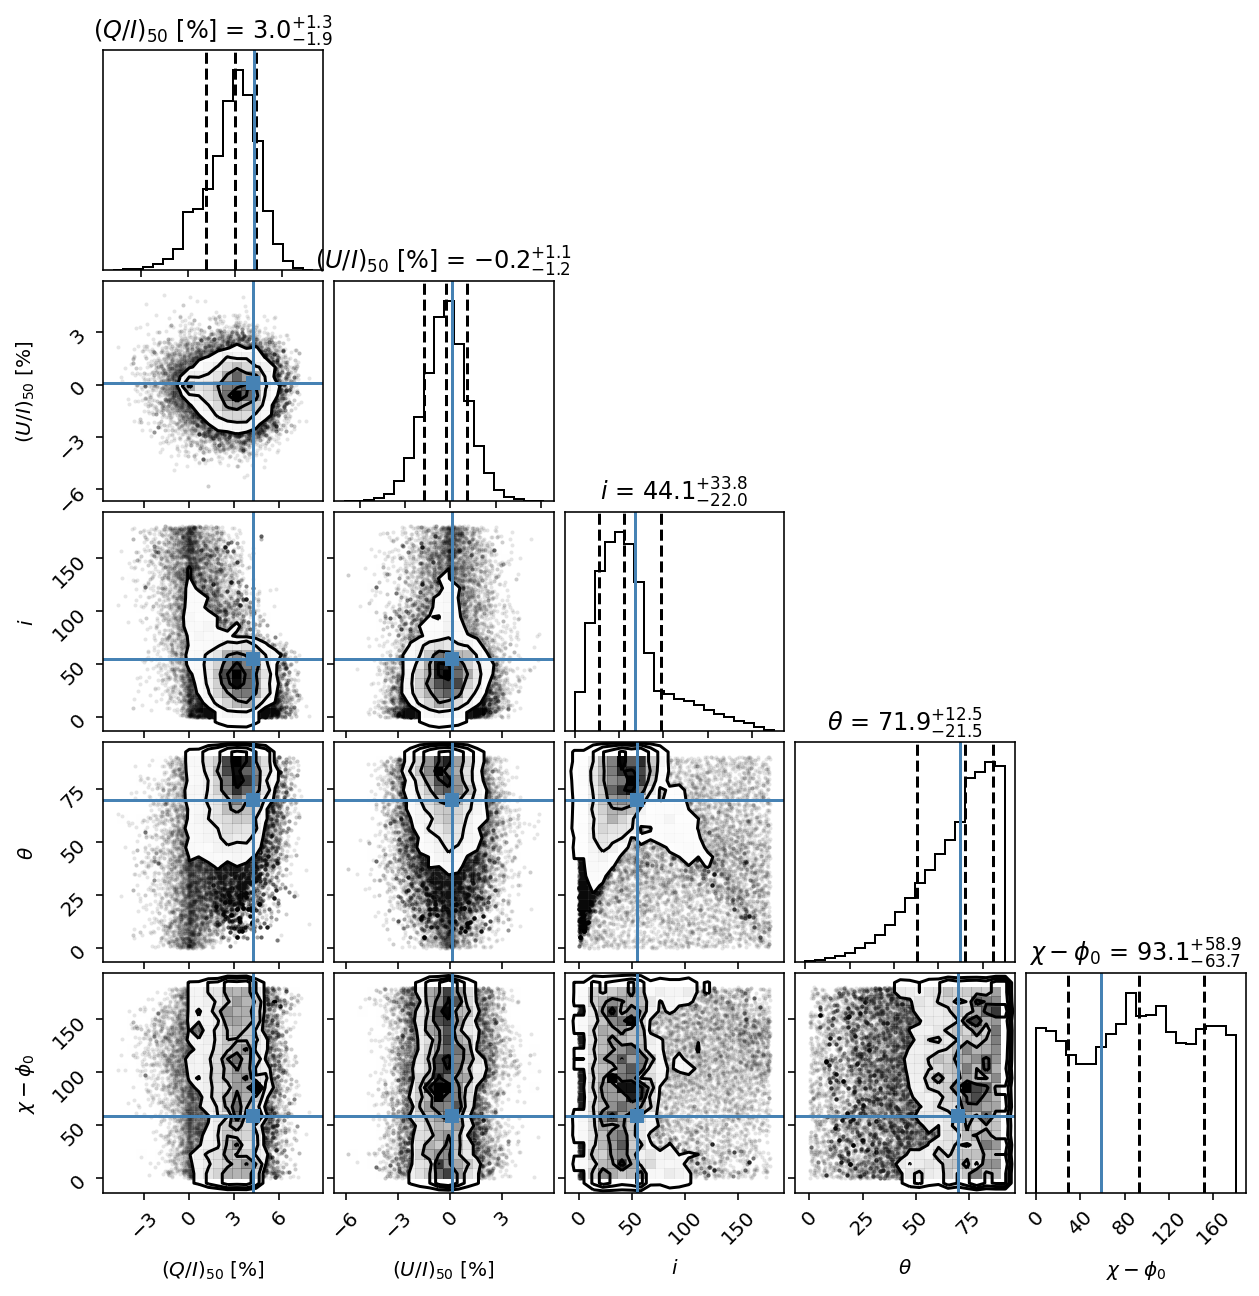

In [16]:
pshift=-0.045
fig=plt.figure(figsize=(9,9))
aa=np.radians(dd4b[::nskip,3]+(dd4b[::nskip,4]+pshift)*360)
rr=100*dd4b[::nskip,0]
cc=corner(np.transpose([rr*np.cos(2*aa),rr*np.sin(2*aa),dd4b[::nskip,1],dd4b[::nskip,2],np.mod(dd4b[::nskip,3]-(dd4b[::nskip,4]+pshift)*360,180)]),labels=[r'$(Q/I)_{50}$ [%]',r'$(U/I)_{50}$ [%]',r'$i$',r'$\theta$',r'$\chi-\phi_0$'],weights=np.sin(np.radians(dd4b[::nskip,1]))*np.sin(np.radians(dd4b[::nskip,2])),quantiles=[0.16,0.5,0.84],show_titles=True,fig=fig,title_fmt='.1f',
         truths=(0.042112879179748215*100,
 0.001029770640098895*100,
 54.35870120741751,
 69.83326484482618,58.7)

)
fig.savefig('C3b_sum3_weighted.pdf')